# 0. Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from os import listdir
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 1. Loading Data 

In [2]:
data_path = '../datasets/'
files = listdir(data_path)

In [3]:
files

['campeonato-brasileiro-cartoes.csv',
 'campeonato-brasileiro-full.csv',
 'campeonato-brasileiro-estatisticas-full.csv',
 'campeonato-brasileiro-gols.csv',
 'Legenda.txt']

In [4]:
cards = files[0]
full = files[1]
stats = files[2]
goals = files[3]

## 1.1 Cards

In [5]:
df_cards = pd.read_csv(data_path + cards)
df_cards.head()

,partida_id,rodada,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
1,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
2,4608,1,Internacional,Amarelo,Juan Silveira dos Santos,4.0,Zagueiro,20
3,4608,1,Vitoria,Amarelo,Vinícius Santos Silva,NaN,NaN,82
4,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72


In [6]:
df_cards.isna().sum() / df_cards.shape[0]

partida_id    0.000000
rodada        0.000000
clube         0.000000
cartao        0.000000
atleta        0.000406
num_camisa    0.026138
posicao       0.081121
minuto        0.000000
dtype: float64

In [7]:
df_cards.shape

(14768, 8)

In [8]:
df_cards.dtypes

partida_id      int64
rodada          int64
clube          object
cartao         object
atleta         object
num_camisa    float64
posicao        object
minuto         object
dtype: object

Quantidade de NaN é no máximo 8% em relação ao total da registros.

## 1.2 Full

In [9]:
df_full = pd.read_csv(data_path + full)
df_full

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,7641,38,2021-12-12,21:33,Domingo,Bragantino,Internacional,4-2-3-1,3-4-2-1,D. Aguirre Camblor,D. Aguirre Camblor,Bragantino,nabizao,1,0,SP,RS,SP
7641,7642,38,2021-12-12,21:30,Domingo,Sport,Athletico-PR,4-2-3-1,3-4-2-1,J. Freitas,J. Freitas,-,arena de pernambuco,1,1,PE,PR,-
7642,7643,38,2021-12-12,21:33,Domingo,Juventude,Corinthians,3-4-3,4-3-3,S. Campos Junior,S. Campos Junior,Juventude,alfredo jaconi,1,0,RS,SP,RS
7643,7644,38,2021-12-12,21:33,Domingo,Gremio,Atletico-MG,4-2-3-1,4-2-3-1,A. Stival,A. Stival,Gremio,arena do gremio,4,3,RS,MG,RS


In [10]:
df_full.shape

(7645, 18)

In [11]:
print('% of NaN')
df_full.isna().sum()/df_full.shape[0]

% of NaN


ID                    0.000000
rodada                0.000000
data                  0.000000
hora                  0.000000
dia                   0.000000
mandante              0.000000
visitante             0.000000
formacao_mandante     0.650621
formacao_visitante    0.650621
tecnico_mandante      0.603009
tecnico_visitante     0.603009
vencedor              0.000000
arena                 0.000000
mandante_placar       0.000000
visitante_placar      0.000000
mandante_estado       0.000000
visitante_estado      0.000000
estado_vencedor       0.000000
dtype: float64

In [12]:
df_full.dtypes

ID                     int64
rodada                 int64
data                  object
hora                  object
dia                   object
mandante              object
visitante             object
formacao_mandante     object
formacao_visitante    object
tecnico_mandante      object
tecnico_visitante     object
vencedor              object
arena                 object
mandante_placar        int64
visitante_placar       int64
mandante_estado       object
visitante_estado      object
estado_vencedor       object
dtype: object

In [13]:
df_full['data'] = pd.to_datetime(df_full.data, yearfirst=True)

In [14]:
df_full.head()

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [15]:
df_full.dtypes

ID                             int64
rodada                         int64
data                  datetime64[ns]
hora                          object
dia                           object
mandante                      object
visitante                     object
formacao_mandante             object
formacao_visitante            object
tecnico_mandante              object
tecnico_visitante             object
vencedor                      object
arena                         object
mandante_placar                int64
visitante_placar               int64
mandante_estado               object
visitante_estado              object
estado_vencedor               object
dtype: object

## 1.3 Stats 

In [16]:
df_stats = pd.read_csv(data_path + stats)
df_stats.head()

,partida_id,rodada,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


In [17]:
df_stats.shape

(15290, 13)

In [18]:
print('% of NaN')
df_stats.isna().sum()/df_stats.shape[0]

% of NaN


partida_id         0.000000
rodada             0.000000
clube              0.000000
chutes             0.000000
chutes_no_alvo     0.000000
posse_de_bola      0.602485
passes             0.000000
precisao_passes    0.602485
faltas             0.000000
cartao_amarelo     0.000000
cartao_vermelho    0.000000
impedimentos       0.000000
escanteios         0.000000
dtype: float64

In [19]:
df_stats.dtypes

partida_id          int64
rodada              int64
clube              object
chutes              int64
chutes_no_alvo      int64
posse_de_bola      object
passes              int64
precisao_passes    object
faltas              int64
cartao_amarelo      int64
cartao_vermelho     int64
impedimentos        int64
escanteios          int64
dtype: object

<AxesSubplot:>

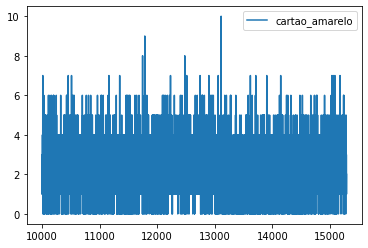

In [20]:
df_stats[10000:].plot(y='cartao_amarelo')

In [21]:
df_stats_clube = df_stats[10000:].groupby('clube').mean()
df_stats_clube = df_stats_clube.drop(['partida_id', 'rodada'], axis = 1)
df_stats_clube.head()

,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
clube,,,,,,,,
America-MG,12.324561,2.561404,397.912281,14.763158,1.859649,0.105263,1.587719,4.657895
Athletico-PR,11.659091,3.049242,415.041667,14.003788,1.996212,0.083333,1.526515,4.617424
Atletico-GO,11.789474,3.561404,385.026316,15.912281,2.210526,0.087719,1.508772,5.315789
Atletico-MG,14.178030,3.484848,475.352273,14.594697,2.030303,0.090909,1.875000,5.962121
Avai,11.433628,1.955752,350.460177,14.858407,2.415929,0.159292,1.477876,4.858407


In [22]:
df_stats_clube = df_stats_clube.reset_index()

In [23]:
df_stats_clube.head()

,clube,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,America-MG,12.324561,2.561404,397.912281,14.763158,1.859649,0.105263,1.587719,4.657895
1,Athletico-PR,11.659091,3.049242,415.041667,14.003788,1.996212,0.083333,1.526515,4.617424
2,Atletico-GO,11.789474,3.561404,385.026316,15.912281,2.210526,0.087719,1.508772,5.315789
3,Atletico-MG,14.178030,3.484848,475.352273,14.594697,2.030303,0.090909,1.875000,5.962121
4,Avai,11.433628,1.955752,350.460177,14.858407,2.415929,0.159292,1.477876,4.858407


## 1.4 Goals 

In [24]:
df_goals = pd.read_csv(data_path + goals)
df_goals.head()

,partida_id,rodada,clube,atleta,minuto
0,4607,1,Fluminense,Rafael Sóbis,31
1,4607,1,Fluminense,Fred,45
2,4607,1,Fluminense,Nirley da Silva Fonseca,59
3,4608,1,Internacional,Charles Aránguiz,6
4,4610,1,Athletico-PR,Dráusio Luis Salla Gil,16


In [25]:
df_goals.shape

(7081, 5)

In [26]:
print('% of NaN')
df_goals.isna().sum()/df_goals.shape[0]

% of NaN


partida_id    0.0
rodada        0.0
clube         0.0
atleta        0.0
minuto        0.0
dtype: float64

In [27]:
df_goals.dtypes

partida_id     int64
rodada         int64
clube         object
atleta        object
minuto        object
dtype: object

## 1.5 Legend

**Legenda - campeonato-brasileiro-full.csv**
- ID : ID da partida
- Rodada : Rodada que aconteceu a partida
- Data : Data que ocorreu a partida
- Horário :  Horário que ocorreu a partida
- Dia : Dia da semana que ocorreu a partida
- Mandante : Clube mandante                      
- Visitante : Clube Visitante
- formacao_mandante: Formação do mandante
- formacao_visitante: Formação do visitante
- tecnico_mandante: Técnico do mandante
- tecnico_visitante: Técnico do visitante
- Vencedor : Clube vencedor da partida. Quando tiver "-", é um empate
- Arena : Arena que ocorreu a partida                      
- Mandante Placar : Gols que o clube mandante fez na partida                      
- Visitante Placar : Gols que o clube visitante fez na partida                      
- Estado Mandante : Estado do clube mandatorio                      
- Estado Visitante : Estado do clube visitante                      
- Estado Vencedor : Estado do clube vencedor. Quando tiver "-", é um empate


**Legenda - campeonato-brasileiro-estatisticas-full.csv**
- partida_ID - ID da partida
- Rodada - Rodada da partida
- Clube - Nome do clube
- Chutes - Finalizações
- Chutes a gol - Finalizações na direção do gol
- Posse de bola - Percentual da posse de bola
- Passes - Quantidade de passes que o clube deu na partida
- precisao_passes - Percentual da precisão de passe
- Faltas - Quantidade de faltas cometidas na partida
- cartao_amarelo - Quantidade de cartões amarelos para o clube na partida
- cartao_vermelho - Quantidade de cartões vermelhos para o clube na partida
- Impedimentos - Quantidade de impedimentos para o clube na partida
- Escanteios - Quantidade de escanteios para o clube na partida


**Legenda - campeonato-brasileiro-gols.csv**
- partida_ID - ID da partida
- Rodada - Rodada da partida
- Clube - Nome do clube
- Atleta - Nome do atleta que fez o gol
- Minuto - Minuto na partida em que o gol foi marcado


**Legenda - campeonato-brasileiro-cartoes.csv**
- partida_ID - ID da partida
- Rodada - Rodada da partida
- Clube - Nome do clube
- Cartao - Cor do cartão aplicado
- Atleta - Nome do atleta punido pelo cartão
- num_camisa - Número da camisa do atleta
- Posicao - Posição na partida em que o atleta se encontra
- Minuto - Minuto na partida em que o cartão foi aplicado

## 1.6 Filling NA and and filtering data

In [28]:
# creating a new df with the sum of df_stats
df_stats_match = df_stats.groupby('partida_id').sum()
df_stats_match.index.names = ['ID']
df_full_id = df_full.set_index(['ID']).drop('rodada', axis = 1)

In [29]:
# join df_full and df_stats_match (sum of stats)
df_full_stats_match = df_full_id.join(df_stats_match, on='ID')

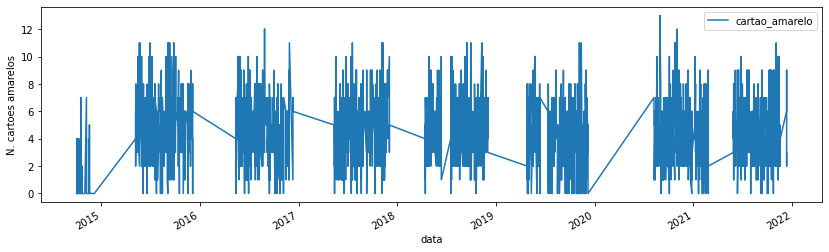

In [30]:
# checking the time series of 'cartao_amarelo' sum
df_full_stats_match[df_full_stats_match.data > '2014-10-01'].plot(x='data', y='cartao_amarelo', figsize = (14,4));
plt.ylabel('N. cartoes amarelos');

In [31]:
# Seems that are missing values from the begining of the series, so I decided to select data only from 2014-10-01
df_full_stats_match_filtered = df_full_stats_match[df_full_stats_match.data > '2014-10-01']

In [32]:
df_full_stats_match_filtered.head()

,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,...,estado_vencedor,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
ID,,,,,,,,,,,,,,,,,,,,,
4696,2014-10-11,18:33,Sabado,Botafogo-RJ,Corinthians,NaN,NaN,L. Venker de Menezes,L. Venker de Menezes,Botafogo-RJ,...,RJ,18,0,0,0,0,0,0,0,0
4867,2014-10-02,19:30,Quinta-feira,Palmeiras,Chapecoense,NaN,NaN,J. da Silva,J. da Silva,Palmeiras,...,SP,52,0,0,0,0,0,0,0,0
4868,2014-10-04,16:20,Sabado,Flamengo,Santos,NaN,NaN,E. Alves Moreira,E. Alves Moreira,Santos,...,SP,52,0,0,0,0,0,0,0,0
4869,2014-10-04,16:21,Sabado,Fluminense,Bahia,NaN,NaN,G. Kleina,G. Kleina,-,...,-,52,0,0,0,0,0,0,0,0
4870,2014-10-04,16:24,Sabado,Coritiba,Athletico-PR,4-2-2-2,4-3-3,C. dos Santos Oliveira,C. dos Santos Oliveira,Coritiba,...,PR,52,19,0,633,37,4,0,2,12


In [33]:
df_full_stats_match_filtered  = df_full_stats_match_filtered.dropna()

In [34]:
df_full_stats_match_filtered.isna().sum() / df_full_stats_match_filtered.shape[0]

data                  0.0
hora                  0.0
dia                   0.0
mandante              0.0
visitante             0.0
formacao_mandante     0.0
formacao_visitante    0.0
tecnico_mandante      0.0
tecnico_visitante     0.0
vencedor              0.0
arena                 0.0
mandante_placar       0.0
visitante_placar      0.0
mandante_estado       0.0
visitante_estado      0.0
estado_vencedor       0.0
rodada                0.0
chutes                0.0
chutes_no_alvo        0.0
passes                0.0
faltas                0.0
cartao_amarelo        0.0
cartao_vermelho       0.0
impedimentos          0.0
escanteios            0.0
dtype: float64

In [35]:
df_full_stats_match_filtered.head()

,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,...,estado_vencedor,rodada,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
ID,,,,,,,,,,,,,,,,,,,,,
4870,2014-10-04,16:24,Sabado,Coritiba,Athletico-PR,4-2-2-2,4-3-3,C. dos Santos Oliveira,C. dos Santos Oliveira,Coritiba,...,PR,52,19,0,633,37,4,0,2,12
4698,2014-10-11,18:30,Sabado,Goias,Coritiba,4-4-2,4-2-2-2,M. dos Santos Gonçalves,M. dos Santos Gonçalves,Goias,...,GO,56,29,0,972,29,4,0,1,6
4891,2014-10-19,16:00,Domingo,Athletico-PR,Flamengo,4-3-3,4-2-3-1,V. Luxemburgo da Silva,V. Luxemburgo da Silva,Athletico-PR,...,PR,58,17,0,896,18,2,0,10,8
4892,2014-10-19,16:00,Domingo,Figueirense,Coritiba,4-1-2-1-2,4-3-2-1,M. dos Santos Gonçalves,M. dos Santos Gonçalves,Figueirense,...,SC,58,23,0,793,34,7,0,7,11
4898,2014-10-22,19:30,Quarta-feira,Corinthians,Vitoria,4-2-3-1,4-1-2-1-2,N. da Silveira Júnior,N. da Silveira Júnior,Corinthians,...,SP,60,20,0,869,30,2,0,3,13


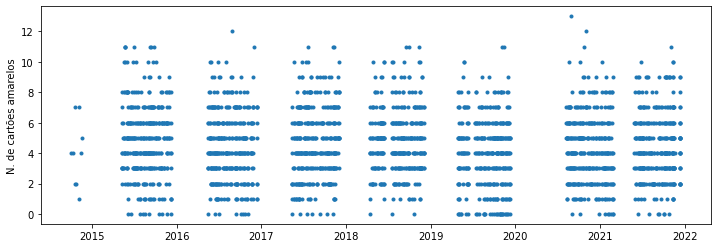

In [36]:
plt.figure(figsize=(12,4));
plt.plot(df_full_stats_match_filtered.data, df_full_stats_match_filtered.cartao_amarelo, '.')
plt.ylabel('N. de cartões amarelos');

# 2. Exploratory Data Analysy

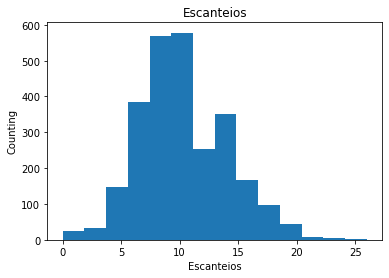

In [37]:
plt.hist(df_full_stats_match_filtered.escanteios, bins=14);
plt.title('Escanteios');
plt.ylabel('Counting');
plt.xlabel('Escanteios');

In [38]:
df_full_stats_match_filtered.escanteios.describe()    

count    2663.000000
mean       10.287646
std         3.670177
min         0.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        26.000000
Name: escanteios, dtype: float64

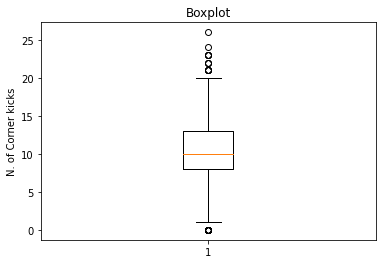

In [39]:
plt.title('Boxplot')
plt.boxplot(df_full_stats_match_filtered.escanteios);
plt.ylabel('N. of Corner kicks');

# 3. Feature Engineering 

In [40]:
columns_previous = ['hora',                 
                    'dia',                  
                    'mandante',             
                    'visitante',            
                    'formacao_mandante',    
                    'formacao_visitante',   
                    'tecnico_mandante',     
                    'tecnico_visitante',    
                    #'vencedor',             
                    'arena',                
                    #'mandante_placar',      
                    #'visitante_placar',     
                    'mandante_estado',      
                    'visitante_estado',     
                    #'estado_vencedor',      
                    'rodada',               
                    #'chutes',               
                    #'chutes_no_alvo',       
                    #'passes',               
                    #'faltas',               
                    #'cartao_amarelo'       
                    #'cartao_vermelho',      
                    #'impedimentos',         
                    'escanteios'
                   ]

In [41]:
#columns_previous = ['hora',                  
#                    'dia',                   
#                    'mandante',              
#                    'visitante',             
#                    'formacao_mandante',     
#                    'formacao_visitante',                         
#                    'mandante_estado',       
#                    'visitante_estado',      
#                    'rodada',                
#                    'escanteios']        

In [42]:
df3 = df_full_stats_match_filtered[columns_previous]

In [43]:
df3.loc[:,'hora_decimal'] = pd.to_datetime(df3.hora).dt.hour + pd.to_datetime(df3.hora).dt.minute / 60

/tmp/ipykernel_22133/1442731621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'hora_decimal'] = pd.to_datetime(df3.hora).dt.hour + pd.to_datetime(df3.hora).dt.minute / 60


In [44]:
df3['hora_sin_'] = df3['hora_decimal'].apply(lambda x: np.sin(x * (2 * np.pi/24)))

/tmp/ipykernel_22133/1815872509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['hora_sin_'] = df3['hora_decimal'].apply(lambda x: np.sin(x * (2 * np.pi/24)))


In [45]:
df3 = df3.drop(['hora', 'hora_decimal'], axis = 1)

In [46]:
df3.insert(2, 'hora_sin', df3.hora_sin_)

In [47]:
df3 = df3.drop('hora_sin_', axis = 1)

In [48]:
df3.head()

,dia,mandante,hora_sin,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,arena,mandante_estado,visitante_estado,rodada,escanteios
ID,,,,,,,,,,,,,
4870,Sabado,Coritiba,-0.913545,Athletico-PR,4-2-2-2,4-3-3,C. dos Santos Oliveira,C. dos Santos Oliveira,couto pereira,PR,PR,52,12
4698,Sabado,Goias,-0.991445,Coritiba,4-4-2,4-2-2-2,M. dos Santos Gonçalves,M. dos Santos Gonçalves,estadio do governo do estado de goias serra do...,GO,PR,56,6
4891,Domingo,Athletico-PR,-0.866025,Flamengo,4-3-3,4-2-3-1,V. Luxemburgo da Silva,V. Luxemburgo da Silva,estadio joaquim americo guimaraes,PR,RJ,58,8
4892,Domingo,Figueirense,-0.866025,Coritiba,4-1-2-1-2,4-3-2-1,M. dos Santos Gonçalves,M. dos Santos Gonçalves,orlando scarpelli,SC,PR,58,11
4898,Quarta-feira,Corinthians,-0.923880,Vitoria,4-2-3-1,4-1-2-1-2,N. da Silveira Júnior,N. da Silveira Júnior,arena pantanal,SP,BA,60,13


In [49]:
df3.dtypes

dia                    object
mandante               object
hora_sin              float64
visitante              object
formacao_mandante      object
formacao_visitante     object
tecnico_mandante       object
tecnico_visitante      object
arena                  object
mandante_estado        object
visitante_estado       object
rodada                  int64
escanteios              int64
dtype: object

In [50]:
df3['escanteios_mandante'] = df3['mandante'].map(df_stats_clube.set_index('clube')['escanteios'])
df3['escanteios_visitante'] = df3['visitante'].map(df_stats_clube.set_index('clube')['escanteios'])

df3['chutes_mandante'] = df3['mandante'].map(df_stats_clube.set_index('clube')['chutes'])
df3['chutes_visitante'] = df3['visitante'].map(df_stats_clube.set_index('clube')['chutes'])


df3['mandante_noalvo'] = df3['mandante'].map(df_stats_clube.set_index('clube')['chutes_no_alvo'])
df3['visitante_noalvo'] = df3['visitante'].map(df_stats_clube.set_index('clube')['chutes_no_alvo'])

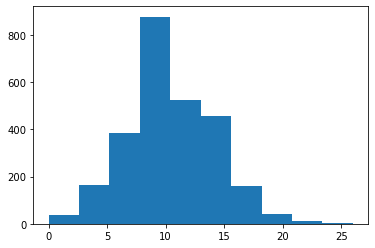

In [51]:
plt.hist(df3.escanteios);

In [52]:
df3['maior_que_95'] = 1* (df3.escanteios > 9.5)

In [53]:
df3.head()

,dia,mandante,hora_sin,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,arena,mandante_estado,visitante_estado,rodada,escanteios,escanteios_mandante,escanteios_visitante,chutes_mandante,chutes_visitante,mandante_noalvo,visitante_noalvo,maior_que_95
ID,,,,,,,,,,,,,,,,,,,,
4870,Sabado,Coritiba,-0.913545,Athletico-PR,4-2-2-2,4-3-3,C. dos Santos Oliveira,C. dos Santos Oliveira,couto pereira,PR,PR,52,12,4.566667,4.617424,11.453333,11.659091,1.946667,3.049242,1
4698,Sabado,Goias,-0.991445,Coritiba,4-4-2,4-2-2-2,M. dos Santos Gonçalves,M. dos Santos Gonçalves,estadio do governo do estado de goias serra do...,GO,PR,56,6,4.419643,4.566667,12.000000,11.453333,2.526786,1.946667,0
4891,Domingo,Athletico-PR,-0.866025,Flamengo,4-3-3,4-2-3-1,V. Luxemburgo da Silva,V. Luxemburgo da Silva,estadio joaquim americo guimaraes,PR,RJ,58,8,4.617424,6.166038,11.659091,14.698113,3.049242,3.973585,0
4892,Domingo,Figueirense,-0.866025,Coritiba,4-1-2-1-2,4-3-2-1,M. dos Santos Gonçalves,M. dos Santos Gonçalves,orlando scarpelli,SC,PR,58,11,4.432432,4.566667,9.851351,11.453333,0.054054,1.946667,1
4898,Quarta-feira,Corinthians,-0.923880,Vitoria,4-2-3-1,4-1-2-1-2,N. da Silveira Júnior,N. da Silveira Júnior,arena pantanal,SP,BA,60,13,5.242424,4.973684,12.037879,13.315789,2.920455,2.535088,1


In [54]:
encode = ['dia',                  
          'mandante',             
          'visitante',            
          'formacao_mandante',    
          'formacao_visitante',   
          'tecnico_mandante',     
          'tecnico_visitante',    
          'arena',                
          'mandante_estado',      
          'visitante_estado']

In [55]:
df3_encoded = pd.DataFrame()

df3_encoded['dia'] = LabelEncoder().fit_transform(df3['dia'])
df3_encoded['mandante'] = LabelEncoder().fit_transform(df3['mandante'])
df3_encoded['visitante'] = LabelEncoder().fit_transform(df3['visitante'])
df3_encoded['formacao_mandante'] = LabelEncoder().fit_transform(df3['formacao_mandante'])
df3_encoded['formacao_visitante'] = LabelEncoder().fit_transform(df3['formacao_visitante'])
df3_encoded['tecnico_visitante'] = LabelEncoder().fit_transform(df3['tecnico_visitante'])
df3_encoded['arena'] = LabelEncoder().fit_transform(df3['arena'])
df3_encoded['mandante_estado'] = LabelEncoder().fit_transform(df3['mandante_estado'])
df3_encoded['visitante_estado'] = LabelEncoder().fit_transform(df3['visitante_estado'])

In [56]:
df31 = df3_encoded.copy()

In [57]:
df31['hora_sin'] = df3.hora_sin.values
df31['rodada'] = df3.rodada.values
df31['chutes_mandante'] = df3.chutes_mandante.values
df31['chutes_visitante'] = df3.chutes_visitante.values
df31['mandante_noalvo'] = df3.mandante_noalvo.values
df31['visitante_noalvo'] = df3.visitante_noalvo.values
df31['maior_que_95'] = df3.maior_que_95.values

In [58]:
df31 = df31.dropna()

In [59]:
df31.head()

,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_visitante,arena,mandante_estado,visitante_estado,hora_sin,rodada,chutes_mandante,chutes_visitante,mandante_noalvo,visitante_noalvo,maior_que_95
0,3,12,1,10,14,30,13,7,7,-0.913545,52,11.453333,11.659091,1.946667,3.049242,1
1,3,20,12,17,9,129,21,3,7,-0.991445,56,12.000000,11.453333,2.526786,1.946667,0
2,0,1,16,15,10,166,26,7,8,-0.866025,58,11.659091,14.698113,3.049242,3.973585,0
3,0,16,12,7,13,129,48,10,7,-0.866025,58,9.851351,11.453333,0.054054,1.946667,1
4,1,11,32,11,6,131,11,11,1,-0.923880,60,12.037879,13.315789,2.920455,2.535088,1


# 4.0 Feature selection and scaling 

In [60]:
df4 = df31.copy()

In [61]:
X = df4.drop(['maior_que_95'], axis=1)
y = df4.maior_que_95

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True)

In [63]:
#y_train = (y_train - np.mean(y_train)) / np.std(y_train)
#y_test = (y_test - np.mean(y_test)) / np.std(y_test)

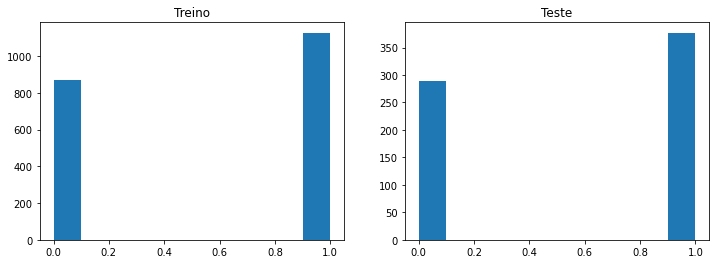

In [64]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Treino');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Teste');

In [65]:
# Number of samples on class 1 - train set
np.sum(y_train == 1) / len(y_train)

0.564629258517034

In [66]:
# Number of samples on class 1 - test set
np.sum(y_test == 1) / len(y_test)

0.566066066066066

# 5.0 Machine Learning Models 

## 5.1 Logistic Regression 

In [67]:
clf_lg = LogisticRegression().fit(X_train, y_train)
y_hat_lg = clf_lg.predict(X_test)

/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
accuracy_score(y_test, y_hat_lg)

0.566066066066066

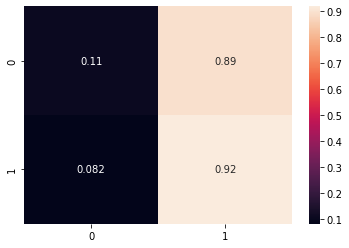

In [69]:
sns.heatmap(confusion_matrix(y_test, y_hat_lg, normalize='true'), annot=True);

In [70]:
print(classification_report(y_test, y_hat_lg))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18       289
           1       0.57      0.92      0.71       377

    accuracy                           0.57       666
   macro avg       0.54      0.51      0.44       666
weighted avg       0.54      0.57      0.48       666



## 5.2 XGBoost 

In [71]:
clf_xgb = xgb.XGBRFClassifier(n_estimators = 1000).fit(X_train, y_train)
yhat_xgb = clf_xgb.predict(X_test)

/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:30:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [72]:
accuracy_score(y_test, yhat_xgb)

0.581081081081081

<AxesSubplot:>

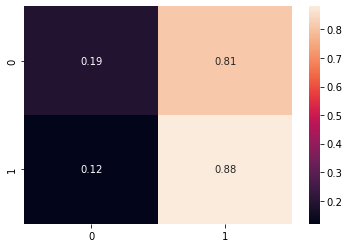

In [73]:
sns.heatmap(confusion_matrix(y_test, yhat_xgb, normalize='true'), annot=True, )

In [74]:
print(classification_report(y_test, yhat_xgb))

              precision    recall  f1-score   support

           0       0.55      0.19      0.28       289
           1       0.59      0.88      0.70       377

    accuracy                           0.58       666
   macro avg       0.57      0.54      0.49       666
weighted avg       0.57      0.58      0.52       666



## 5.3 Random Forests

In [75]:
clf_rf = RandomForestClassifier(n_estimators = 2000, n_jobs = -1, random_state = 42).fit(X_train, y_train)
yhat_rf = clf_rf.predict(X_test)

In [76]:
accuracy_score(y_test, yhat_rf)

0.5570570570570571

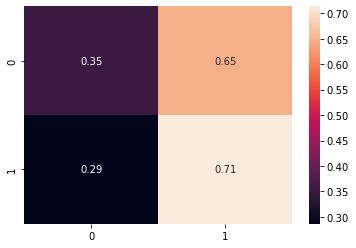

In [77]:
sns.heatmap(confusion_matrix(y_test, yhat_rf, normalize='true'), annot=True, );

In [78]:
print(classification_report(y_test, yhat_rf))

              precision    recall  f1-score   support

           0       0.49      0.35      0.41       289
           1       0.59      0.71      0.65       377

    accuracy                           0.56       666
   macro avg       0.54      0.53      0.53       666
weighted avg       0.54      0.56      0.54       666



## 5.4 SVM 

In [79]:
clf_svc = svm.SVC().fit(X_train, y_train)
y_hat_svc = clf_svc.predict(X_test)

In [80]:
accuracy_score(y_test, y_hat_svc)

0.5675675675675675

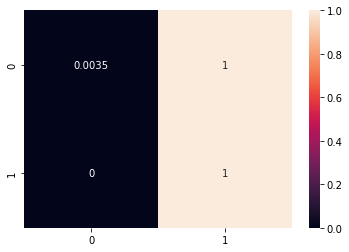

In [81]:
sns.heatmap(confusion_matrix(y_test, y_hat_svc, normalize='true'), annot=True);

In [82]:
print(classification_report(y_test, y_hat_svc))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01       289
           1       0.57      1.00      0.72       377

    accuracy                           0.57       666
   macro avg       0.78      0.50      0.37       666
weighted avg       0.75      0.57      0.41       666



## 5.5 Naive Bayes 

In [83]:
clf_gb = GaussianNB().fit(X_train, y_train)
y_hat_gnb = clf_gb.predict(X_test)

In [84]:
accuracy_score(y_test, y_hat_gnb)

0.5675675675675675

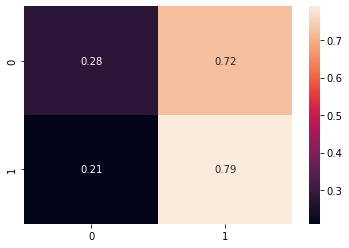

In [85]:
sns.heatmap(confusion_matrix(y_test, y_hat_gnb, normalize='true'), annot=True, );

In [86]:
print(classification_report(y_test, y_hat_gnb))

              precision    recall  f1-score   support

           0       0.50      0.28      0.36       289
           1       0.59      0.79      0.67       377

    accuracy                           0.57       666
   macro avg       0.55      0.53      0.52       666
weighted avg       0.55      0.57      0.54       666



## 5.6 SGD Classifier 

In [87]:
clf_sgd = SGDClassifier().fit(X_train, y_train)
y_hat_sgd = clf_sgd.predict(X_test)

In [88]:
accuracy_score(y_test, y_hat_sgd)

0.4339339339339339

<AxesSubplot:>

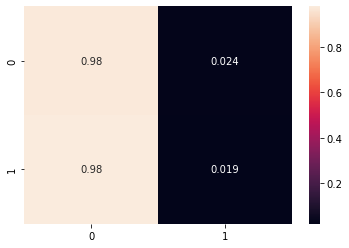

In [89]:
sns.heatmap(confusion_matrix(y_test, y_hat_sgd, normalize='true'), annot=True, )

In [90]:
print(classification_report(y_test, y_hat_sgd))

              precision    recall  f1-score   support

           0       0.43      0.98      0.60       289
           1       0.50      0.02      0.04       377

    accuracy                           0.43       666
   macro avg       0.47      0.50      0.32       666
weighted avg       0.47      0.43      0.28       666



## 5.7 Decision Tree

In [91]:
clf_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_hat_dt = clf_dt.predict(X_test)

In [92]:
accuracy_score(y_test, y_hat_dt)

0.5315315315315315

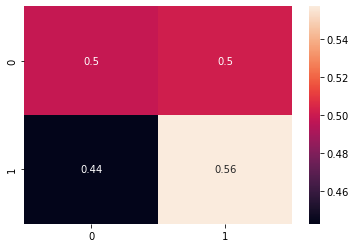

In [93]:
sns.heatmap(confusion_matrix(y_test, y_hat_dt, normalize='true'), annot=True, );

In [94]:
print(classification_report(y_test, y_hat_dt))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       289
           1       0.59      0.56      0.57       377

    accuracy                           0.53       666
   macro avg       0.53      0.53      0.53       666
weighted avg       0.54      0.53      0.53       666



# 6.0 Ensemble 

In [95]:
eclf = VotingClassifier(estimators=[('logistic', clf_lg), ('xgb', clf_xgb), ('random_forest', clf_rf), ('naive_bayes', clf_gb), ('decision_tree', clf_dt)], voting='hard')

In [96]:
for clf, label in zip([clf_lg, clf_xgb, clf_rf, clf_gb, clf_dt], ['logistic', 'xgb', 'random_forest', 'naive_bayes', 'decision_tree' ]):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Accuracy: 0.55 (+/- 0.02) [logistic]
[10:30:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:30:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:30:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:30:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:30:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.55 (+/- 0.02) [xgb]
Accuracy: 0.53 (+/- 0.01) [random_forest]
Accuracy: 0.54 (+/- 0.03) [naive_bayes]
Accuracy: 0.51 (+/- 0.02) [decision_tree]


In [97]:
eclf = VotingClassifier(estimators=[('logistic', clf_lg), ('xgb', clf_xgb), ('random_forest', clf_rf), ('naive_bayes', clf_gb), ('decision_tree', clf_dt)], voting='hard').fit(X_train, y_train)

/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mahelvson/anaconda3/envs/foot/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, Use

[10:30:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [98]:
y_hat_eclf = eclf.predict(X_test)

In [99]:
accuracy_score(y_test, y_hat_eclf)

0.575075075075075

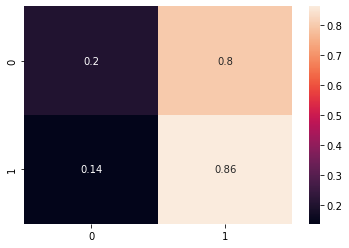

In [100]:
sns.heatmap(confusion_matrix(y_test, y_hat_eclf, normalize='true'), annot=True, );

In [101]:
print(classification_report(y_test, y_hat_eclf))

              precision    recall  f1-score   support

           0       0.53      0.20      0.29       289
           1       0.58      0.86      0.70       377

    accuracy                           0.58       666
   macro avg       0.56      0.53      0.49       666
weighted avg       0.56      0.58      0.52       666

